In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import theano
import time

from theano import tensor as T, function
from IPython import display

Using gpu device 0: GeForce 940M (CNMeM is enabled with initial size: 80.0% of memory, cuDNN not available)


# A simple problem

In [2]:
noise_var = .7 # noise variance, conrtrols how hard is the problem, the larger the harder
n_samples = 3000 # number of observations

n = np.random.normal(0, noise_var, n_samples).astype('float32')
x = np.arange(n_samples).astype('float32')
x = (x - x.mean()) / x.std() # always a good practice to standardize the input data
w, b = np.random.randn(2).astype('float32')

d = w * x  + b # correct answer
y = d + n # noisy observations

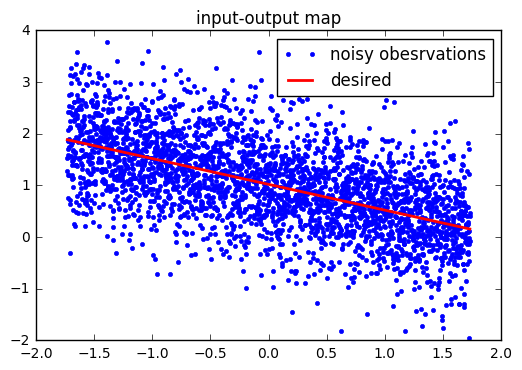

In [3]:
plt.plot(x, y, '.')
plt.plot(x, d, '-r', linewidth=2.)
plt.legend(('noisy obesrvations', 'desired'))
plt.title('input-output map')

# Theano model

In [4]:
X, Y = T.vectors('input', 'desired')

# initialization shared variables
W = theano.shared(.01)
B = theano.shared(0.)

Z = W * X + B
Cost = ((Y - Z) ** 2).mean() # cost is the mean squared value
params = [W, B] # parameters that should be learned

# Changing Theano variables in place

In [5]:
W.get_value()

array(0.01)

In [6]:
W

<TensorType(float64, scalar)>

In [7]:
# replace with new values
updates = ((W, W*2),)
double_w = function([], [], updates=updates)

double_w()
W.get_value()

array(0.02)

# Traning the model

In [8]:
# cost = (d-y)**2
#
# updates:
# w = w - lr*grad(cost, w) = w + lr*2*(d-y)*x
# b = b - lr*grad(cost, b) = b + lr*2*(d-y)

# learning rate
lr = .1

grads = [T.grad(Cost, p) for p in params]
updates = [(p, p - lr * g) for p, g in zip(params, grads)]

In [9]:
updates

[(<TensorType(float64, scalar)>, Elemwise{sub,no_inplace}.0),
 (<TensorType(float64, scalar)>, Elemwise{sub,no_inplace}.0)]

In [10]:
train = function([X, Y], Cost, updates=updates)

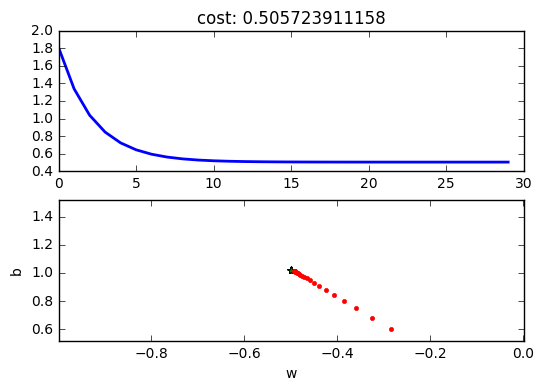

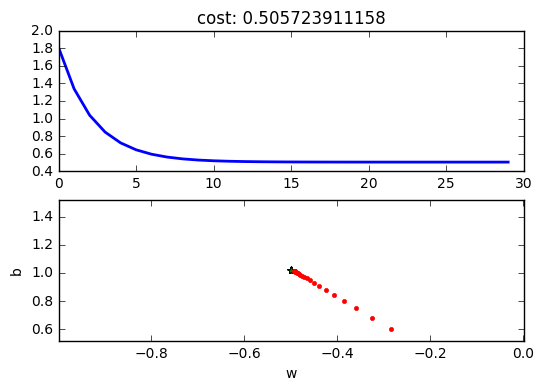

In [11]:
epochs = 30
final_cost = []
for i in range(epochs):
    #for inp,out in zip(x, y):
    
        # This is all we need to train the model, to call train()
        final_cost.append(train(x, y))
        
        ### Extra niceties ###
        what, bhat = W.get_value(), B.get_value()
        
        # cost function
        plt.subplot(211)
        plt.cla()
        plt.title('cost: {}'.format(final_cost[-1]))
        plt.plot(final_cost, linewidth=2.)
        
        # paramter space
        plt.subplot(212)
        plt.plot(w, b, '*', linewidth=2.)
        plt.plot(what, bhat, '.r', linewidth=2.)
        plt.xlim([w - .5, w + .5])
        plt.ylim([b - .5, b + .5])
        plt.xlabel('w')
        plt.ylabel('b')

                
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(0.5)

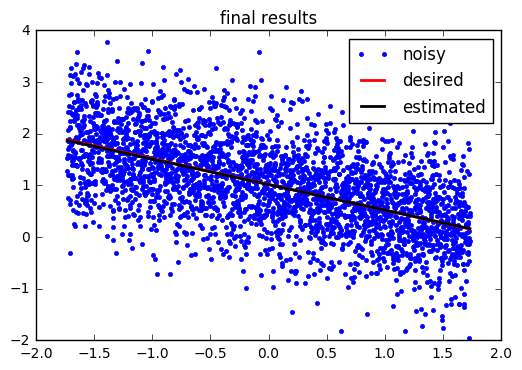

In [12]:
# estimated line

plt.title('final results')
plt.plot(x, y, '.')
plt.plot(x, d, 'r', linewidth=2.)
plt.plot(x, what * x + bhat, 'k', linewidth=2.)
plt.legend(('noisy', 'desired', 'estimated'))